In [25]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from UnetModel import UNetDir, UNetIso

In [26]:
os.chdir(r"C:\project\Main")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [27]:
##load model

ISO = UNetIso().to(device)
ISO.load_state_dict(torch.load('UnetModel_0030.pth'))
ISO.eval()  # Set the model to evaluation mode

DIR = UNetDir().to(device)
DIR.load_state_dict(torch.load('unet_dir_L2augv3.pth'))
DIR.eval()  # Set the model to evaluation mode

UNetDir(
  (enc1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc4): Sequential(
    (0): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
  )
  (enc5): Sequential(
    (0): Conv2d(512, 1024, kern

In [28]:
#input
ATN = np.load(r'C:\project\Main\Testing_data\Antenna\ATN2_888.npy').astype(np.float32)
BDM = np.load(r'C:\project\Main\Testing_data\Building\building2_11.npy').astype(np.float32)
SPR = np.load(r'C:\project\Main\Testing_data\Sparse_SSmap\Sparse_SSmap2_888_0.npy').astype(np.float32)

# ground truth
PGM = np.load(r'C:\project\Main\Testing_data\PGmap\PGM2_888.npy').astype(np.float32)
FSS = np.load(r'C:\project\Main\Testing_data\GT\SSmap2_888_0.npy').astype(np.float32)

In [29]:
# Using Unet Iso
input_image1 = np.stack([ATN, BDM], axis=-1)
input_image1 = torch.from_numpy(input_image1).permute(2, 0, 1).unsqueeze(0).to(device)
with torch.no_grad():
    PGG = ISO(input_image1)
PGG = PGG.squeeze().cpu().numpy()

# Using Unet Dir
input_image2 = np.stack([PGG, BDM, SPR], axis=-1)
input_image2 = torch.from_numpy(input_image2).permute(2, 0, 1).unsqueeze(0).to(device)
with torch.no_grad():
    FSG = DIR(input_image2)
FSG = FSG.squeeze().cpu().numpy()

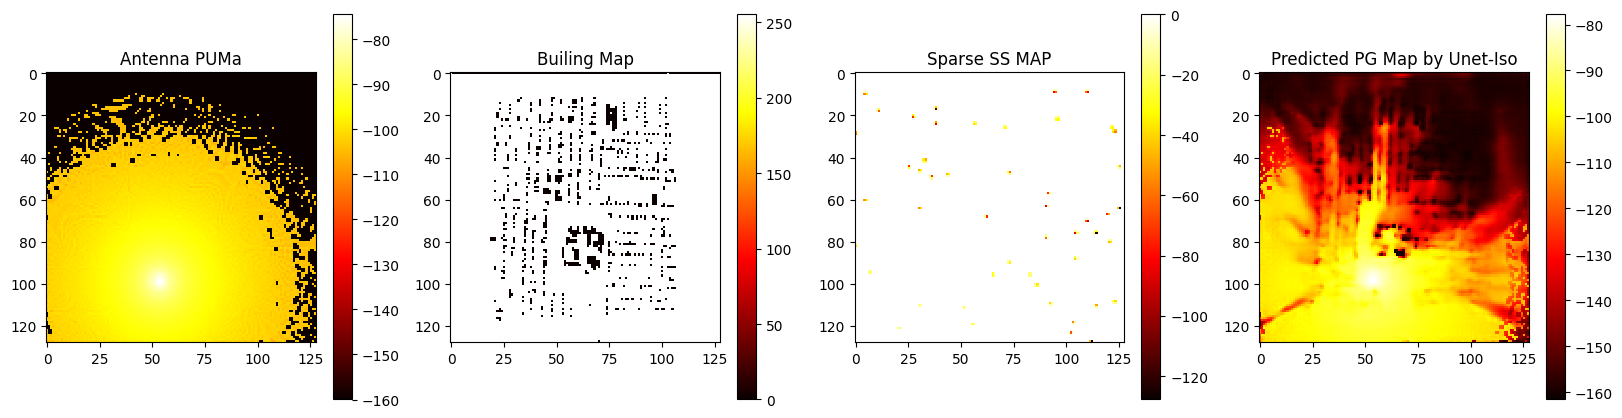

In [30]:
#print inputs, figure size
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(ATN, cmap='hot',interpolation='none')
plt.title('Antenna PUMa')
plt.colorbar()

plt.subplot(1, 4, 2)
plt.imshow(BDM, cmap='hot',interpolation='none')
plt.title('Builing Map')
plt.colorbar()

plt.subplot(1, 4, 3)
plt.imshow(SPR, cmap='hot',interpolation='none')
plt.title('Sparse SS MAP')
plt.colorbar()

plt.subplot(1, 4, 4)
plt.imshow(PGG, cmap='hot',interpolation='none')
plt.title('Predicted PG Map by Unet-Iso')
plt.colorbar()

plt.show()

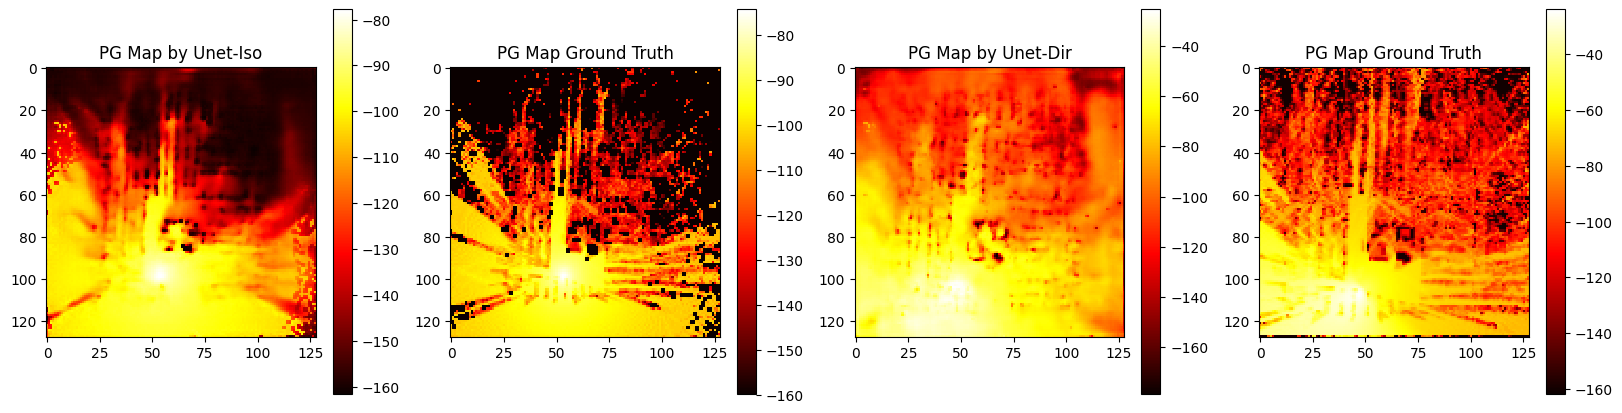

In [31]:
# print outputs and ground truth
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(PGG, cmap='hot',interpolation='none')
plt.title('PG Map by Unet-Iso')
plt.colorbar()

plt.subplot(1, 4, 2)
plt.imshow(PGM, cmap='hot',interpolation='none')
plt.title('PG Map Ground Truth')
plt.colorbar()

plt.subplot(1, 4, 3)
plt.imshow(FSG, cmap='hot',interpolation='none')
plt.title('PG Map by Unet-Dir')
plt.colorbar()

plt.subplot(1, 4, 4)
plt.imshow(FSS, cmap='hot',interpolation='none')
plt.title('PG Map Ground Truth')
plt.colorbar()

plt.show()


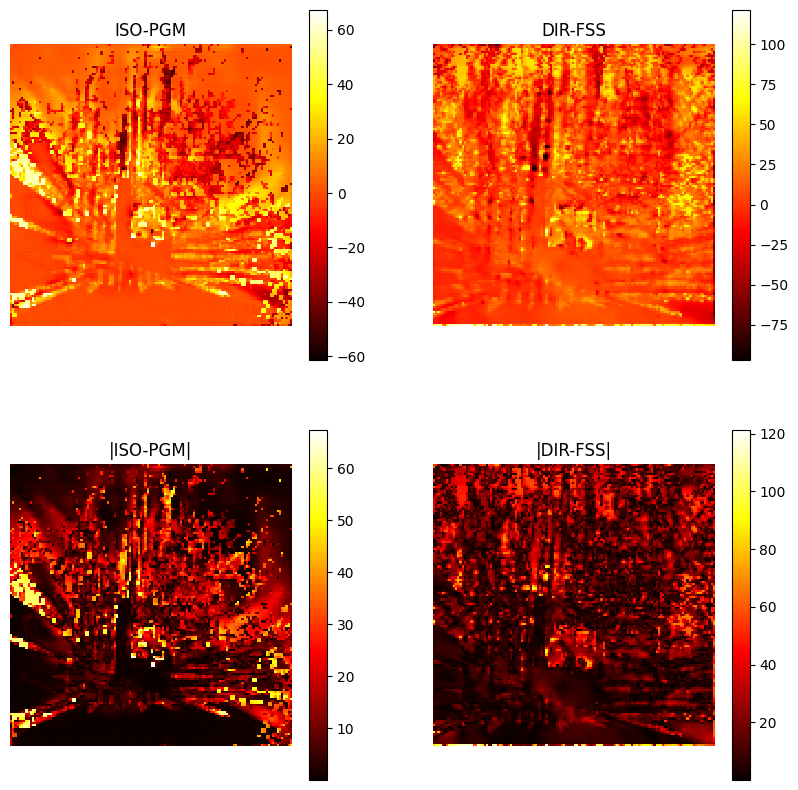

In [34]:
# print difference, do not show axis
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.imshow(PGG - PGM, cmap='hot',interpolation='none')
plt.title('ISO-PGM')
plt.axis('off')
plt.colorbar()

plt.subplot(2, 2, 2)
plt.imshow(FSG - FSS, cmap='hot',interpolation='none')
plt.title('DIR-FSS')
plt.axis('off')
plt.colorbar()

plt.subplot(2, 2, 3)
plt.imshow(abs(PGG - PGM), cmap='hot',interpolation='none')
plt.title('|ISO-PGM|')
plt.axis('off')
plt.colorbar()

plt.subplot(2, 2, 4)
plt.imshow(abs(FSG - FSS), cmap='hot',interpolation='none')
plt.title('|DIR-FSS|')
plt.axis('off')
plt.colorbar()

plt.show()
